# Cài đặt môi trường và lấy Data

In [1]:
# !pip install tensorflow pandas matplotlib scikit-learn

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv(os.path.join('data', 'train', 'train.csv'))

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df.iloc[1]['comment_text']




"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [7]:
df[df.columns[2:]].iloc[1]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 1, dtype: int64

In [8]:
df[df['toxic'] == 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


# Tiền xử lý

In [9]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.3.1
aiobotocore                       2.19.0
aiofiles                          25.1.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.5.0
anaconda-anon-usage               0.7.1
anaconda-auth                     0.8.6
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.5.2
anaconda-client                   1.13.0
anaconda-navigator                2.6.6
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.7.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow          

In [10]:
# TextVectorization dùng để chuyển đổi văn bản thành dạng số
from tensorflow.keras.layers import TextVectorization


In [11]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
df[df.columns[2:]].values 
# lấy tất cả các cột từ cột thứ 2 trở đi gộp lại thành mảng 2 chiều

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [13]:
MAX_FEATURES = 200000 # số lượng từ tối đa mà chúng ta muốn lưu trữ

In [14]:
vectorizer = TextVectorization(
    max_tokens=MAX_FEATURES,  # Lấy 200000 từ xuất hiện nhiều nhất
    output_sequence_length=1800,  # Quy đổi các comment thành dạng số và đưa vào mảng 1800 cột
    output_mode='int' # chuyển đổi văn bản thành dạng số
)

In [15]:
X.values # lấy tất cả các comment chuyển thành mảng 1 chiều

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [16]:
vectorizer.adapt(X.values) 
# đọc tất cả bình luận và chọn ra 200000 từ xuất hiện nhiều nhất
# gán mỗi từ một số tương ứng

In [17]:
vectorizer('Hello world, life is good')[:5] 
# xem mỗi bình luận đã được chuyển thành dạng số như thế nào

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9,  98])>

In [18]:
vectorizer.get_vocabulary() # xem danh sách từ điển

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [19]:
vectorizer_texts = vectorizer(X.values) 
# chuyển đổi tất cả bình luận thành dạng số

In [20]:
vectorizer_texts

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_texts, y))
# tạo dataset từ vectorizer_texts và y
dataset = dataset.cache()
# lưu vào bộ nhớ cache
dataset = dataset.shuffle(buffer_size=160000)
# trộn ngẫu nhiên các bình luận
dataset = dataset.batch(16)
# batch size là 16
dataset = dataset.prefetch(8)
# prefetch là 8
# ý nghĩa là khi máy tính đang học nhóm 1 (có 16 bình luận) 
# thì máy tính đang chuẩn bị học nhóm 2, 3, 4, 5, 6, 7, 8 (có 16 bình luận)
# Việc này giúp máy tính học liên tục mà không bị gián đoạn

In [22]:
batch_X, batch_y = dataset.as_numpy_iterator().next()
# xem dữ liệu đầu tiên của dataset
print(batch_X.shape)
print(batch_y.shape)



(16, 1800)
(16, 6)


In [23]:
train_data = dataset.take(int(len(dataset)*0.7))
val_data = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test_data = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [24]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

6981
1994
997


In [25]:
train_generator = train_data.as_numpy_iterator() 
# đây là cơ chế đặc biệt giúp máy tính lấy từng batch dữ liệu mỗi khi cần

In [26]:
train_generator.next() # next là lấy dữ liệu tiếp theo

(array([[   55,   436,    36, ...,     0,     0,     0],
        [   49,     8,    51, ...,     0,     0,     0],
        [   77,   175,    13, ...,     0,     0,     0],
        ...,
        [    8,    69,    50, ...,     0,     0,     0],
        [   48,  2257, 39426, ...,     0,     0,     0],
        [  167,     4,  2511, ...,     0,     0,     0]]),
 array([[1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Tạo mô hình tuần tự (Sequential Model)

In [27]:
from tensorflow.keras.models import Sequential # tạo mô hình tuần tự
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Embedding
# Dense là lớp kết nối đầy đủ (fully connected layer)
# LSTM (Long Short-Term Memory) là lớp xử lý dữ liệu dạng chuỗi
# Bidirectional dùng để bọc lớp LSTM 
# để LSTM có thể đọc một câu theo 2 hướng (xuôi và ngược)
# Embedding là bước biến số thành các dãy số vector 
# để máy tính biết từ đó và mối quan hệ giữa các từ

In [28]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(train_data, validation_data=val_data, epochs=1)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2203s 315ms/step - loss: 0.0632 - val_loss: 0.0476


In [32]:
history.history

{'loss': [0.06320000439882278], 'val_loss': [0.047571830451488495]}

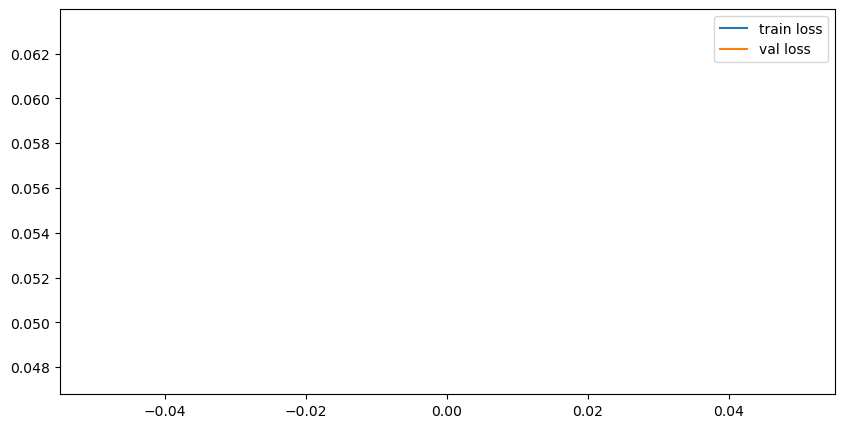

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# Dự đoán kết quả

In [37]:
input_text = vectorizer('I hate you, I am going to kill you')
result = model.predict(np.expand_dims(input_text, 0))
# np.expand_dims(input_text, 0) là thêm chiều mới vào mảng 1 chiều
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.9545654 , 0.10603345, 0.7935412 , 0.07930472, 0.6931772 ,
        0.08764787]], dtype=float32)

In [41]:
batch_X, batch_y = test_data.as_numpy_iterator().next()


In [42]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [43]:
predictions = (model.predict(batch_X) > 0.5).astype(int)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

#  Evaluate the Model

In [44]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()
for batch in test_data.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    rec.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━

# Build a Deep Learning Gradio App

In [45]:
!pip install gradio jinja2

  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/21.6 MB ? eta -:--:--
   - -------------------------------------- 0.8/21.6 MB 4.5 MB/s eta 0:00:05
   -- ------------------------------------- 1.6/21.6 MB 5.1 MB/s eta 0:00:04
   ----- ---------------------------------- 3.1/21.6 MB 6.0 MB/s eta 0:00:04
   -------- ------------------------------- 4.7/21.6 MB 6.4 MB/s eta 0:00:03
   ------------ --------------------------- 6.6/21.6 MB 6.9 MB/s eta 0:00:03
   --------------- ------------------------ 8.1/21.6 MB 7.0 MB/s eta 0:00:02
   ----------------- ---------------------- 9.7/21.6 MB 7.1 MB/s eta 0:00:02
   -------------------- ------------------- 11.0/21.6 MB 7.1 MB/s eta 0:00:02
   ---------------------- ----------------- 12.1/21.6 MB 6.7 MB/s eta 0:00:02
   ------------------------ --------------- 13.1/21.6 MB 6.7 MB/s eta 0:00:02
   -------------------------- ------------- 14.4/21.6 MB 6.6 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import gradio as gr

In [47]:
model.save('toxic_comment_model.h5')

In [48]:
model = tf.keras.models.load_model('toxic_comment_model.h5')

In [52]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [51]:
input_text = vectorizer('I hate you, I am going to kill you')
result = model.predict(np.expand_dims(input_text, 0))
result > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ True, False,  True, False,  True, False]])

In [53]:
def score_comment(comment):
    input_text = vectorizer(comment)
    prediction = model.predict(np.expand_dims(input_text, 0))
    
    text = ''
    for idx, col in enumerate(df.columns[2:-1]):
        text += f"{col}: {prediction[0][idx] > 0.5}\n"
    return text



In [55]:
!pip install gradio==3.50

  Using cached MarkupSafe-2.1.5.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ?

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + C:\Users\Sang\anaconda3\python.exe C:\Users\Sang\AppData\Local\Temp\pip-install-dpg4ajyd\numpy_785cad61683342ac9250c0bd47f88b06\vendored-meson\meson\meson.py setup C:\Users\Sang\AppData\Local\Temp\pip-install-dpg4ajyd\numpy_785cad61683342ac9250c0bd47f88b06 C:\Users\Sang\AppData\Local\Temp\pip-install-dpg4ajyd\numpy_785cad61683342ac9250c0bd47f88b06\.mesonpy-taaeu6v_ -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Sang\AppData\Local\Temp\pip-install-dpg4ajyd\numpy_785cad61683342ac9250c0bd47f88b06\.mesonpy-taaeu6v_\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\Sang\AppData\Local\Temp\pip-install-dpg4ajyd\numpy_785cad61683342ac9250c0bd47f88b06
      Build dir: C:\Users\Sang\AppData\Local\Temp\pip-install-dpg4ajyd\numpy_785cad61683342ac9250c0bd4

In [ ]:
interface = gr.Interface(
    fn=score_comment, 
    inputs=gr.Textbox(lines=2, placeholder='Comment to score'), 
    outputs='text'
)
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://9ee776690941586e1a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
